In [2]:
from arcgis.gis import GIS
#source_portal_username = input("Enter username of source organization admin: ")
target=GIS(url="https://ps-dbs.maps.arcgis.com/home", username="bhorne_ps", password="78thbdv5")

#target_portal_username = input("Enter username of target organization admin: ")
source=GIS(url="https://ps-dbs.maps.arcgis.com/home", username="bhorne_ps_dbs", password="78tHbDv5")

In [13]:
import arcgis
from arcgis.gis import GIS
import os

<Item title:"Dragon Sightings" type:Form owner:bhorne_PS_DBS>
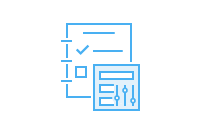

In [10]:
hosted_flyr = source.content.get("538be0b6c9104f6482049110e8dbf65c")
hosted_flyr

In [14]:
survey_manager = arcgis.apps.survey123.SurveyManager(source)
group = source.groups.get('c3d10e7089af45699f944549bd64f08a')
sourceForms = group.search('type:form')['results']
sourceForms

[<Item title:"Dragon Sightings" type:Form owner:bhorne_PS_DBS>]

In [16]:
import time
time.sleep(30)
targetForms = target.content.search('type:form group:'+shared_group.id)
print("Cloned surveys: ", *targetForms, sep="\n")

Cloned surveys: 
<Item title:"Dragon Sightings" type:Form owner:bhorne_PS>


In [17]:
source_item_with_data = survey_manager.get("538be0b6c9104f6482049110e8dbf65c")
survey_folder = source_item_with_data.properties['ownerFolder']

usr = arcgis.gis.User(source, source.users.me.username)

full_folder = usr.folders

# Identify the folder associated with the survey
fldr = next((f for f in full_folder if f['id'] == survey_folder), 0)

#List all the items within that folder to be cloned later on
fldr_items = usr.items(folder=fldr)
print("Folder items:", *fldr_items, sep="\n")

Folder items:
<Item title:"Dragon Sightings" type:Feature Layer Collection owner:bhorne_PS_DBS>
<Item title:"Dragon Sightings" type:Form owner:bhorne_PS_DBS>
<Item title:"Dragon Sightings" type:Web Map owner:bhorne_PS_DBS>
<Item title:"Dragon Sightings" type:Feature Layer Collection owner:bhorne_PS_DBS>
<Item title:"DrogonWinterfell8x01" type:Image owner:bhorne_PS_DBS>


In [18]:
# Create a new folder with the same name as the source folder to clone the contents to
target.content.create_folder(folder=fldr['title']+"_Python")

# Clone items to the new folder
cloned_items = target.content.clone_items(items=fldr_items, folder=fldr['title']+"_Python")
print(*cloned_items, sep="\n")
print("Result feature count: ", cloned_items[0].layers[0].query(where='1=1', return_count_only=True))

# Search for the cloned survey and update the form item to ensure all resources are rebuilt
search_clone_survey = target.content.search(f"title: {source_item_with_data.properties['title']} AND owner: {target.users.me.username} Form")
cloned_survey = search_clone_survey[0]
download_survey = cloned_survey.download(file_name=cloned_survey.id+'.zip')
cloned_survey.update({},download_survey)
os.remove(download_survey)

<Item title:"Dragon Sightings" type:Feature Layer Collection owner:bhorne_PS>
<Item title:"Dragon Sightings" type:Feature Layer Collection owner:bhorne_PS>
<Item title:"DrogonWinterfell8x01" type:Image owner:bhorne_PS>
<Item title:"Dragon Sightings" type:Form owner:bhorne_PS>
<Item title:"Dragon Sightings" type:Web Map owner:bhorne_PS>
Result feature count:  0
